# Introduction To Crime.

In [106]:
# Importing Nesecarry Libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [107]:
# Scraping the data from link
url = "https://www.wikiwand.com/en/crime_in_india"
page = requests.get(url)
page

<Response [200]>

In [108]:
soup = BeautifulSoup(page.text)

In [109]:
html_content = """
<tbody>
<tr>
<td><a href="/en/India" title="India" class="wl">India</a></td><td>4831515</td><td>5007044</td><td>5074635</td><td>5156172</td><td>100.0</td><td>385.5</td></tr>
<tr>
<td><a href="/en/Andhra_Pradesh" title="Andhra Pradesh" class="wl">Andhra Pradesh</a></td><td>129389</td><td>148002</td><td>144703</td><td>145751</td><td>2.8</td><td>278.6</td></tr>
<tr>
<td><a href="/en/Arunachal_Pradesh" title="Arunachal Pradesh" class="wl">Arunachal Pradesh</a></td><td>2700</td><td>2746</td><td>2817</td><td>2877</td><td>0.1</td><td>190.9</td></tr>
<tr>
<td><a href="/en/Assam" title="Assam" class="wl">Assam</a></td><td>107014</td><td>109952</td><td>120572</td><td>123783</td><td>2.6</td><td>385.8</td></tr>
<tr>
<td><a href="/en/Bihar" title="Bihar" class="wl">Bihar</a></td><td>189696</td><td>236055</td><td>262815</td><td>269109</td><td>5.2</td><td>224.0</td></tr>
<tr>
<td><a href="/en/Chhattisgarh" title="Chhattisgarh" class="wl">Chhattisgarh</a></td><td>84192</td><td>90516</td><td>98233</td><td>96561</td><td>1.9</td><td>334.7</td></tr>
<tr>
<td><a href="/en/Goa" title="Goa" class="wl">Goa</a></td><td>3706</td><td>3943</td><td>3884</td><td>3727</td><td>0.1</td><td>241.5</td></tr>
<tr>
<td><a href="/en/Gujarat" title="Gujarat" class="wl">Gujarat</a></td><td>435422</td><td>334799</td><td>393194</td><td>431066</td><td>8.4</td><td>631.6</td></tr>
<tr>
<td><a href="/en/Haryana" title="Haryana" class="wl">Haryana</a></td><td>143111</td><td>224816</td><td>191229</td><td>166336</td><td>3.2</td><td>577.4</td></tr>
<tr>
<td><a href="/en/Himachal_Pradesh" title="Himachal Pradesh" class="wl">Himachal Pradesh</a></td><td>17249</td><td>17796</td><td>19594</td><td>19924</td><td>0.4</td><td>272.4</td></tr>
<tr>
<td><a href="/en/Jammu_and_Kashmir_(state)" title="Jammu and Kashmir (state)" class="wl">Jammu and Kashmir</a></td><td>26624</td><td>25608</td><td>27276</td><td>25408</td><td>0.5</td><td>187.8</td></tr>
<tr>
<td><a href="/en/Jharkhand" title="Jharkhand" class="wl">Jharkhand</a></td><td>47817</td><td>52664</td><td>55664</td><td>62206</td><td>1.2</td><td>165.5</td></tr>
<tr>
<td><a href="/en/Karnataka" title="Karnataka" class="wl">Karnataka</a></td><td>179479</td><td>184063</td><td>163416</td><td>163691</td><td>3.2</td><td>248.1</td></tr>
<tr>
<td><a href="/en/Kerala" title="Kerala" class="wl">Kerala</a></td><td>707870</td><td>653500</td><td>512167</td><td>453083</td><td>8.8</td><td>1287.7</td></tr>
<tr>
<td><a href="/en/Madhya_Pradesh" title="Madhya Pradesh" class="wl">Madhya Pradesh</a></td><td>365154</td><td>379682</td><td>405129</td><td>395619</td><td>7.7</td><td>478.9</td></tr>
<tr>
<td><a href="/en/Maharashtra" title="Maharashtra" class="wl">Maharashtra</a></td><td>430866</td><td>467753</td><td>515674</td><td>509443</td><td>9.9</td><td>415.8</td></tr>
<tr>
<td><a href="/en/Manipur" title="Manipur" class="wl">Manipur</a></td><td>4098</td><td>4250</td><td>3781</td><td>3661</td><td>0.1</td><td>117.7</td></tr>
<tr>
<td><a href="/en/Meghalaya" title="Meghalaya" class="wl">Meghalaya</a></td><td>3582</td><td>3952</td><td>3482</td><td>3897</td><td>0.1</td><td>120.6</td></tr>
<tr>
<td><a href="/en/Mizoram" title="Mizoram" class="wl">Mizoram</a></td><td>2800</td><td>2738</td><td>2351</td><td>2880</td><td>0.1</td><td>241.0</td></tr>
<tr>
<td><a href="/en/Nagaland" title="Nagaland" class="wl">Nagaland</a></td><td>1908</td><td>1553</td><td>1775</td><td>1661</td><td>0.0</td><td>77.1</td></tr>
<tr>
<td><a href="/en/Odisha" title="Odisha" class="wl">Odisha</a></td><td>103565</td><td>103866</td><td>107408</td><td>121525</td><td>2.4</td><td>277.9</td></tr>
<tr>
<td><a href="/en/Punjab,_India" title="Punjab, India" class="wl">Punjab</a></td><td>57739</td><td>70673</td><td>70318</td><td>72855</td><td>1.4</td><td>243.3</td></tr>
<tr>
<td><a href="/en/Rajasthan" title="Rajasthan" class="wl">Rajasthan</a></td><td>251147</td><td>245553</td><td>250546</td><td>304394</td><td>5.9</td><td>392.3</td></tr>
<tr>
<td><a href="/en/Sikkim" title="Sikkim" class="wl">Sikkim</a></td><td>1020</td><td>979</td><td>869</td><td>821</td><td>0.0</td><td>123.5</td></tr>
<tr>
<td><a href="/en/Tamil_Nadu" title="Tamil Nadu" class="wl">Tamil Nadu</a></td><td>467369</td><td>420876</td><td>499188</td><td>455094</td><td>8.8</td><td>600.3</td></tr>
<tr>
<td><a href="/en/Telangana" title="Telangana" class="wl">Telangana</a></td><td>120273</td><td>133197</td><td>126858</td><td>131254</td><td>2.5</td><td>352.0</td></tr>
<tr>
<td><a href="/en/Tripura" title="Tripura" class="wl">Tripura</a></td><td>4081</td><td>4238</td><td>6078</td><td>5988</td><td>0.1</td><td>149.6</td></tr>
<tr>
<td><a href="/en/Uttar_Pradesh" title="Uttar Pradesh" class="wl">Uttar Pradesh</a></td><td>494025</td><td>600082</td><td>585157</td><td>628578</td><td>12.2</td><td>278.2</td></tr>
<tr>
<td><a href="/en/Uttarakhand" title="Uttarakhand" class="wl">Uttarakhand</a></td><td>16074</td><td>28861</td><td>34715</td><td>28268</td><td>0.5</td><td>252.8</td></tr>
<tr>
<td><a href="/en/West_Bengal" title="West Bengal" class="wl">West Bengal</a></td><td>204400</td><td>195537</td><td>188063</td><td>*****</td><td>3.6</td><td>193.7</td></tr>
<tr>
<td><a href="/en/Andaman_and_Nicobar_Islands" title="Andaman and Nicobar Islands" class="wl">Andaman and Nicobar Islands</a></td><td>2491</td><td>3014</td><td>3699</td><td>4034</td><td>0.1</td><td>1013.6</td></tr>
<tr>
<td><a href="/en/Chandigarh" title="Chandigarh" class="wl">Chandigarh</a></td><td>4256</td><td>5462</td><td>5967</td><td>4518</td><td>0.1</td><td>381.6</td></tr>
<tr>
<td><a href="/en/Dadra_and_Nagar_Haveli" title="Dadra and Nagar Haveli" class="wl">Dadra and Nagar Haveli</a></td><td>256</td><td>309</td><td>315</td><td>290</td><td>0.0</td><td>52.2</td></tr>
<tr>
<td><a href="/en/Daman_and_Diu" title="Daman and Diu" class="wl">Daman and Diu</a></td><td>287</td><td>382</td><td>334</td><td>370</td><td>0.0</td><td>87.5</td></tr>
<tr>
<td><a href="/en/Delhi" title="Delhi" class="wl">Delhi</a></td><td>216920</td><td>244714</td><td>262612</td><td>316261</td><td>5.2</td><td>1586.1</td></tr>
<tr>
<td><a href="/en/Lakshadweep" title="Lakshadweep" class="wl">Lakshadweep</a></td><td>50</td><td>114</td><td>77</td><td>182</td><td>0.0</td><td>267.6</td></tr>
<tr>
<td><a href="/en/Puducherry_(union_territory)" title="Puducherry (union territory)" class="wl">Puducherry</a></td><td>4885</td><td>4799</td><td>4674</td><td>4004</td><td>0.1</td><td>264.3</td></tr>
</tbody>
"""
soup = BeautifulSoup(html_content, "html.parser")
table_body = soup.find("tbody")
data = []

# Iterate over each row in the table body
for row in table_body.find_all("tr"):
    # Extract data from each cell in the row
    cell_data = [cell.get_text(strip=True) for cell in row.find_all("td")]
    # Append the row data to the main data list
    data.append(cell_data)

for row in data:
    print(row)


['India', '4831515', '5007044', '5074635', '5156172', '100.0', '385.5']
['Andhra Pradesh', '129389', '148002', '144703', '145751', '2.8', '278.6']
['Arunachal Pradesh', '2700', '2746', '2817', '2877', '0.1', '190.9']
['Assam', '107014', '109952', '120572', '123783', '2.6', '385.8']
['Bihar', '189696', '236055', '262815', '269109', '5.2', '224.0']
['Chhattisgarh', '84192', '90516', '98233', '96561', '1.9', '334.7']
['Goa', '3706', '3943', '3884', '3727', '0.1', '241.5']
['Gujarat', '435422', '334799', '393194', '431066', '8.4', '631.6']
['Haryana', '143111', '224816', '191229', '166336', '3.2', '577.4']
['Himachal Pradesh', '17249', '17796', '19594', '19924', '0.4', '272.4']
['Jammu and Kashmir', '26624', '25608', '27276', '25408', '0.5', '187.8']
['Jharkhand', '47817', '52664', '55664', '62206', '1.2', '165.5']
['Karnataka', '179479', '184063', '163416', '163691', '3.2', '248.1']
['Kerala', '707870', '653500', '512167', '453083', '8.8', '1287.7']
['Madhya Pradesh', '365154', '379682', 

In [110]:
# Converting The Scrapped Data to DataFrame
crime = pd.DataFrame(data)

In [111]:
crime

0        1        2        3        4      5  \
0                         India  4831515  5007044  5074635  5156172  100.0   
1                Andhra Pradesh   129389   148002   144703   145751    2.8   
2             Arunachal Pradesh     2700     2746     2817     2877    0.1   
3                         Assam   107014   109952   120572   123783    2.6   
4                         Bihar   189696   236055   262815   269109    5.2   
5                  Chhattisgarh    84192    90516    98233    96561    1.9   
6                           Goa     3706     3943     3884     3727    0.1   
7                       Gujarat   435422   334799   393194   431066    8.4   
8                       Haryana   143111   224816   191229   166336    3.2   
9              Himachal Pradesh    17249    17796    19594    19924    0.4   
10            Jammu and Kashmir    26624    25608    27276    25408    0.5   
11                    Jharkhand    47817    52664    55664    62206    1.2   
12                    Karnataka   179479   184063   163416   163691    3.2   
13                       Kerala   707870   653500   512167   453083    8.8   
14               Madhya Pradesh   365154   379682   405129   395619    7.7   
15                  Maharashtra   430866   467753   515674   509443    9.9   
16                      Manipur     4098     4250     3781     3661    0.1   
17                    Meghalaya     3582     3952     3482     3897    0.1   
18                      Mizoram     2800     2738     2351     2880    0.1   
19                     Nagaland     1908     1553     1775     1661    0.0   
20                       Odisha   103565   103866   107408   121525    2.4   
21                       Punjab    57739    70673    70318    72855    1.4   
22                    Rajasthan   251147   245553   250546   304394    5.9   
23                       Sikkim     1020      979      869      821    0.0   
24                   Tamil Nadu   467369   420876   499188   455094    8.8   
25                    Telangana   120273   133197   126858   131254    2.5   
26                      Tripura     4081     4238     6078     5988    0.1   
27                Uttar Pradesh   494025   600082   585157   628578   12.2   
28                  Uttarakhand    16074    28861    34715    28268    0.5   
29                  West Bengal   204400   195537   188063    *****    3.6   
30  Andaman and Nicobar Islands     2491     3014     3699     4034    0.1   
31                   Chandigarh     4256     5462     5967     4518    0.1   
32       Dadra and Nagar Haveli      256      309      315      290    0.0   
33                Daman and Diu      287      382      334      370    0.0   
34                        Delhi   216920   244714   262612   316261    5.2   
35                  Lakshadweep       50      114       77      182    0.0   
36                   Puducherry     4885     4799     4674     4004    0.1   

         6  
0    385.5  
1    278.6  
2    190.9  
3    385.8  
4    224.0  
5    334.7  
6    241.5  
7    631.6  
8    577.4  
9    272.4  
10   187.8  
11   165.5  
12   248.1  
13  1287.7  
14   478.9  
15   415.8  
16   117.7  
17   120.6  
18   241.0  
19    77.1  
20   277.9  
21   243.3  
22   392.3  
23   123.5  
24   600.3  
25   352.0  
26   149.6  
27   278.2  
28   252.8  
29   193.7  
30  1013.6  
31   381.6  
32    52.2  
33    87.5  
34  1586.1  
35   267.6  
36   264.3

In [112]:
# Assigning the Columns Names.
crime = [
    ['India', '4831515', '5007044', '5074635', '5156172', '100.0', '385.5'],
    ['Andhra Pradesh', '129389', '148002', '144703', '145751', '2.8', '278.6'],
    ['Arunachal Pradesh', '2700', '2746', '2817', '2877', '0.1', '190.9'],
    ['Assam', '107014', '109952', '120572', '123783', '2.6', '385.8'],
    ['Bihar', '189696', '236055', '262815', '269109', '5.2', '224.0'],
    ['Chhattisgarh', '84192', '90516', '98233', '96561', '1.9', '334.7'],
    ['Goa', '3706', '3943', '3884', '3727', '0.1', '241.5'],
    ['Gujarat', '435422', '334799', '393194', '431066', '8.4', '631.6'],
    ['Haryana', '143111', '224816', '191229', '166336', '3.2', '577.4'],
    ['Himachal Pradesh', '17249', '17796', '19594', '19924', '0.4', '272.4'],
    ['Jammu and Kashmir', '26624', '25608', '27276', '25408', '0.5', '187.8'],
    ['Jharkhand', '47817', '52664', '55664', '62206', '1.2', '165.5'],
    ['Karnataka', '179479', '184063', '163416', '163691', '3.2', '248.1'],
    ['Kerala', '707870', '653500', '512167', '453083', '8.8', '1287.7'],
    ['Madhya Pradesh', '365154', '379682', '405129', '395619', '7.7', '478.9'],
    ['Maharashtra', '430866', '467753', '515674', '509443', '9.9', '415.8'],
    ['Manipur', '4098', '4250', '3781', '3661', '0.1', '117.7'],
    ['Meghalaya', '3582', '3952', '3482', '3897', '0.1', '120.6'],
    ['Mizoram', '2800', '2738', '2351', '2880', '0.1', '241.0'],
    ['Nagaland', '1908', '1553', '1775', '1661', '0.0', '77.1'],
    ['Odisha', '103565', '103866', '107408', '121525', '2.4', '277.9'],
    ['Punjab', '57739', '70673', '70318', '72855', '1.4', '243.3'],
    ['Rajasthan', '251147', '245553', '250546', '304394', '5.9', '392.3'],
    ['Sikkim', '1020', '979', '869', '821', '0.0', '123.5'],
    ['Tamil Nadu', '467369', '420876', '499188', '455094', '8.8', '600.3'],
    ['Telangana', '120273', '133197', '126858', '131254', '2.5', '352.0'],
    ['Tripura', '4081', '4238', '6078', '5988', '0.1', '149.6'],
    ['Uttar Pradesh', '494025', '600082', '585157', '628578', '12.2', '278.2'],
    ['Uttarakhand', '16074', '28861', '34715', '28268', '0.5', '252.8'],
    ['West Bengal', '204400', '195537', '188063', '*****', '3.6', '193.7'],
    ['Andaman and Nicobar Islands', '2491', '3014', '3699', '4034', '0.1', '1013.6'],
    ['Chandigarh', '4256', '5462', '5967', '4518', '0.1', '381.6'],
    ['Dadra and Nagar Haveli', '256', '309', '315', '290', '0.0', '52.2'],
    ['Daman and Diu', '287', '382', '334', '370', '0.0', '87.5'],
    ['Delhi', '216920', '244714', '262612', '316261', '5.2', '1586.1'],
    ['Lakshadweep', '50', '114', '77', '182', '0.0', '267.6'],
    ['Puducherry', '4885', '4799', '4674', '4004', '0.1', '264.3']
]

# Define column names for your DataFrame
columns = ['States', '2016', '2017', '2018', '2019', 'Percentage share of state/UT (2019)', 'Crime rate in 2019 (IPC+SLL crimes)']

# Create DataFrame
df = pd.DataFrame(crime, columns=columns)



In [113]:
df

States     2016     2017     2018     2019  \
0                         India  4831515  5007044  5074635  5156172   
1                Andhra Pradesh   129389   148002   144703   145751   
2             Arunachal Pradesh     2700     2746     2817     2877   
3                         Assam   107014   109952   120572   123783   
4                         Bihar   189696   236055   262815   269109   
5                  Chhattisgarh    84192    90516    98233    96561   
6                           Goa     3706     3943     3884     3727   
7                       Gujarat   435422   334799   393194   431066   
8                       Haryana   143111   224816   191229   166336   
9              Himachal Pradesh    17249    17796    19594    19924   
10            Jammu and Kashmir    26624    25608    27276    25408   
11                    Jharkhand    47817    52664    55664    62206   
12                    Karnataka   179479   184063   163416   163691   
13                       Kerala   707870   653500   512167   453083   
14               Madhya Pradesh   365154   379682   405129   395619   
15                  Maharashtra   430866   467753   515674   509443   
16                      Manipur     4098     4250     3781     3661   
17                    Meghalaya     3582     3952     3482     3897   
18                      Mizoram     2800     2738     2351     2880   
19                     Nagaland     1908     1553     1775     1661   
20                       Odisha   103565   103866   107408   121525   
21                       Punjab    57739    70673    70318    72855   
22                    Rajasthan   251147   245553   250546   304394   
23                       Sikkim     1020      979      869      821   
24                   Tamil Nadu   467369   420876   499188   455094   
25                    Telangana   120273   133197   126858   131254   
26                      Tripura     4081     4238     6078     5988   
27                Uttar Pradesh   494025   600082   585157   628578   
28                  Uttarakhand    16074    28861    34715    28268   
29                  West Bengal   204400   195537   188063    *****   
30  Andaman and Nicobar Islands     2491     3014     3699     4034   
31                   Chandigarh     4256     5462     5967     4518   
32       Dadra and Nagar Haveli      256      309      315      290   
33                Daman and Diu      287      382      334      370   
34                        Delhi   216920   244714   262612   316261   
35                  Lakshadweep       50      114       77      182   
36                   Puducherry     4885     4799     4674     4004   

   Percentage share of state/UT (2019) Crime rate in 2019 (IPC+SLL crimes)  
0                                100.0                               385.5  
1                                  2.8                               278.6  
2                                  0.1                               190.9  
3                                  2.6                               385.8  
4                                  5.2                               224.0  
5                                  1.9                               334.7  
6                                  0.1                               241.5  
7                                  8.4                               631.6  
8                                  3.2                               577.4  
9                                  0.4                               272.4  
10                                 0.5                               187.8  
11                                 1.2                               165.5  
12                                 3.2                               248.1  
13                                 8.8                              1287.7  
14                                 7.7                               478.9  
15                                 9.9                               415.8  
16               

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   States                               37 non-null     object
 1   2016                                 37 non-null     object
 2   2017                                 37 non-null     object
 3   2018                                 37 non-null     object
 4   2019                                 37 non-null     object
 5   Percentage share of state/UT (2019)  37 non-null     object
 6   Crime rate in 2019 (IPC+SLL crimes)  37 non-null     object
dtypes: object(7)
memory usage: 2.2+ KB


In [115]:
df.describe()

States     2016     2017     2018     2019  \
count      37       37       37       37       37   
unique     37       37       37       37       37   
top     India  4831515  5007044  5074635  5156172   
freq        1        1        1        1        1   

       Percentage share of state/UT (2019) Crime rate in 2019 (IPC+SLL crimes)  
count                                   37                                  37  
unique                                  21                                  37  
top                                    0.1                               385.5  
freq                                     9                                   1

# cleaning the data:-


In [116]:
df.drop(df[df['States'] == 'India'].index, inplace=True)


In [117]:
df[df['States'] == 'West Bengal']

States    2016    2017    2018   2019  \
29  West Bengal  204400  195537  188063  *****   

   Percentage share of state/UT (2019) Crime rate in 2019 (IPC+SLL crimes)  
29                                 3.6                               193.7

In [118]:
df.replace('*****', '188049', inplace=True)

In [119]:
df[df['States'] == 'West Bengal'] # Based the research in google.

States    2016    2017    2018    2019  \
29  West Bengal  204400  195537  188063  188049   

   Percentage share of state/UT (2019) Crime rate in 2019 (IPC+SLL crimes)  
29                                 3.6                               193.7

In [120]:
df['2016'] =df['2016'].astype(int)

In [121]:
df['2017'] =df['2017'].astype(int)

In [122]:
df['2018'] =df['2018'].astype(int)

In [123]:
df['2019'] =df['2019'].astype(int)

In [124]:
df['Percentage share of state/UT (2019)'] =df['Percentage share of state/UT (2019)'].astype(float)

In [125]:
df['Crime rate in 2019 (IPC+SLL crimes)'] =df['Crime rate in 2019 (IPC+SLL crimes)'].astype(float)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 1 to 36
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               36 non-null     object 
 1   2016                                 36 non-null     int32  
 2   2017                                 36 non-null     int32  
 3   2018                                 36 non-null     int32  
 4   2019                                 36 non-null     int32  
 5   Percentage share of state/UT (2019)  36 non-null     float64
 6   Crime rate in 2019 (IPC+SLL crimes)  36 non-null     float64
dtypes: float64(2), int32(4), object(1)
memory usage: 1.5+ KB


In [127]:
df.describe()

2016           2017           2018           2019  \
count      36.000000      36.000000      36.000000      36.000000   
mean   134208.750000  139084.555556  140962.055556  142976.888889   
std    179824.586425  179039.813320  177762.473342  178679.327780   
min        50.000000     114.000000      77.000000     182.000000   
25%      3675.000000    3949.750000    3760.500000    3854.500000   
50%     52778.000000   61668.500000   62991.000000   67530.500000   
75%    193372.000000  227625.750000  206058.250000  208314.000000   
max    707870.000000  653500.000000  585157.000000  628578.000000   

       Percentage share of state/UT (2019)  \
count                            36.000000   
mean                              2.755556   
std                               3.443125   
min                               0.000000   
25%                               0.100000   
50%                               1.300000   
75%                               4.000000   
max                              12.200000   

       Crime rate in 2019 (IPC+SLL crimes)  
count                            36.000000  
mean                            360.933333  
std                             325.521924  
min                              52.200000  
25%                             190.125000  
50%                             265.950000  
75%                             387.425000  
max                            1586.100000

In [128]:
df1 = df.sort_values(by='2016', ascending = False)

In [129]:
df1

States    2016    2017    2018    2019  \
13                       Kerala  707870  653500  512167  453083   
27                Uttar Pradesh  494025  600082  585157  628578   
24                   Tamil Nadu  467369  420876  499188  455094   
7                       Gujarat  435422  334799  393194  431066   
15                  Maharashtra  430866  467753  515674  509443   
14               Madhya Pradesh  365154  379682  405129  395619   
22                    Rajasthan  251147  245553  250546  304394   
34                        Delhi  216920  244714  262612  316261   
29                  West Bengal  204400  195537  188063  188049   
4                         Bihar  189696  236055  262815  269109   
12                    Karnataka  179479  184063  163416  163691   
8                       Haryana  143111  224816  191229  166336   
1                Andhra Pradesh  129389  148002  144703  145751   
25                    Telangana  120273  133197  126858  131254   
3                         Assam  107014  109952  120572  123783   
20                       Odisha  103565  103866  107408  121525   
5                  Chhattisgarh   84192   90516   98233   96561   
21                       Punjab   57739   70673   70318   72855   
11                    Jharkhand   47817   52664   55664   62206   
10            Jammu and Kashmir   26624   25608   27276   25408   
9              Himachal Pradesh   17249   17796   19594   19924   
28                  Uttarakhand   16074   28861   34715   28268   
36                   Puducherry    4885    4799    4674    4004   
31                   Chandigarh    4256    5462    5967    4518   
16                      Manipur    4098    4250    3781    3661   
26                      Tripura    4081    4238    6078    5988   
6                           Goa    3706    3943    3884    3727   
17                    Meghalaya    3582    3952    3482    3897   
18                      Mizoram    2800    2738    2351    2880   
2             Arunachal Pradesh    2700    2746    2817    2877   
30  Andaman and Nicobar Islands    2491    3014    3699    4034   
19                     Nagaland    1908    1553    1775    1661   
23                       Sikkim    1020     979     869     821   
33                Daman and Diu     287     382     334     370   
32       Dadra and Nagar Haveli     256     309     315     290   
35                  Lakshadweep      50     114      77     182   

    Percentage share of state/UT (2019)  Crime rate in 2019 (IPC+SLL crimes)  
13                                  8.8                               1287.7  
27                                 12.2                                278.2  
24                                  8.8                                600.3  
7                                   8.4                                631.6  
15                                  9.9                                415.8  
14                                  7.7                                478.9  
22                                  5.9                                392.3  
34                                  5.2                               1586.1  
29                                  3.6                                193.7  
4                                   5.2                                224.0  
12                                  3.2                                248.1  
8                                   3.2                                577.4  
1                                   2.8                                278.6  
25                                  2.5                                352.0  
3                                   2.6                                385.8  
20                                  2.4                                277.9  
5                                   1.9                                334.7  
21                                  1.4                                243.3  
11                                  1.2     

# Pivot table:-

In [162]:

data = {
    'State': ['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
    '2016': [2491, 129389, 2700, 107014, 189696, 4256, 84192, 256, 287, 216920, 3706, 435422, 143111, 17249, 26624, 47817, 179479, 707870, 50, 365154, 430866, 4098, 3582, 2800, 1908, 103565, 4885, 57739, 251147, 1020, 467369, 120273, 4081, 494025, 16074, 204400],
    '2017': [3014, 148002, 2746, 109952, 236055, 5462, 90516, 309, 382, 244714, 3943, 334799, 224816, 17796, 25608, 52664, 184063, 653500, 114, 379682, 467753, 4250, 3952, 2738, 1553, 103866, 4799, 70673, 245553, 979, 420876, 133197, 4238, 600082, 28861, 195537],
    '2018': [3699, 144703, 2817, 120572, 262815, 5967, 98233, 315, 334, 262612, 3884, 393194, 191229, 19594, 27276, 55664, 163416, 512167, 77, 405129, 515674, 3781, 3482, 2351, 1775, 107408, 4674, 70318, 250546, 869, 499188, 126858, 6078, 585157, 34715, 188063],
    '2019': [4034, 145751, 2877, 123783, 269109, 4518, 96561, 290, 370, 316261, 3727, 431066, 166336, 19924, 25408, 62206, 163691, 453083, 182, 395619, 509443, 3661, 3897, 2880, 1661, 121525, 4004, 72855, 304394, 821, 455094, 131254, 5988, 628578, 28268, 188049]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a pivot table
pivot_table = df.pivot_table(index='State', values=['2016', '2017', '2018', '2019'])


In [163]:
pivot_table

2016    2017    2018    2019
State                                                      
Andaman and Nicobar Islands    2491    3014    3699    4034
Andhra Pradesh               129389  148002  144703  145751
Arunachal Pradesh              2700    2746    2817    2877
Assam                        107014  109952  120572  123783
Bihar                        189696  236055  262815  269109
Chandigarh                     4256    5462    5967    4518
Chhattisgarh                  84192   90516   98233   96561
Dadra and Nagar Haveli          256     309     315     290
Daman and Diu                   287     382     334     370
Delhi                        216920  244714  262612  316261
Goa                            3706    3943    3884    3727
Gujarat                      435422  334799  393194  431066
Haryana                      143111  224816  191229  166336
Himachal Pradesh              17249   17796   19594   19924
Jammu and Kashmir             26624   25608   27276   25408
Jharkhand                     47817   52664   55664   62206
Karnataka                    179479  184063  163416  163691
Kerala                       707870  653500  512167  453083
Lakshadweep                      50     114      77     182
Madhya Pradesh               365154  379682  405129  395619
Maharashtra                  430866  467753  515674  509443
Manipur                        4098    4250    3781    3661
Meghalaya                      3582    3952    3482    3897
Mizoram                        2800    2738    2351    2880
Nagaland                       1908    1553    1775    1661
Odisha                       103565  103866  107408  121525
Puducherry                     4885    4799    4674    4004
Punjab                        57739   70673   70318   72855
Rajasthan                    251147  245553  250546  304394
Sikkim                         1020     979     869     821
Tamil Nadu                   467369  420876  499188  455094
Telangana                    120273  133197  126858  131254
Tripura                        4081    4238    6078    5988
Uttar Pradesh                494025  600082  585157  628578
Uttarakhand                   16074   28861   34715   28268
West Bengal                  204400  195537  188063  188049

In [ ]:
top_states = melted_df[melted_df['Year'] == '2019'].sort_values(by='Crime Rate', ascending=False)


In [164]:
top_states

State  Year  Crime Rate
141                Uttar Pradesh  2019      628578
128                  Maharashtra  2019      509443
138                   Tamil Nadu  2019      455094
125                       Kerala  2019      453083
119                      Gujarat  2019      431066
127               Madhya Pradesh  2019      395619
117                        Delhi  2019      316261
136                    Rajasthan  2019      304394
112                        Bihar  2019      269109
143                  West Bengal  2019      188049
120                      Haryana  2019      166336
124                    Karnataka  2019      163691
109               Andhra Pradesh  2019      145751
139                    Telangana  2019      131254
111                        Assam  2019      123783
133                       Odisha  2019      121525
114                 Chhattisgarh  2019       96561
135                       Punjab  2019       72855
123                    Jharkhand  2019       62206
142                  Uttarakhand  2019       28268
122            Jammu and Kashmir  2019       25408
121             Himachal Pradesh  2019       19924
140                      Tripura  2019        5988
113                   Chandigarh  2019        4518
108  Andaman and Nicobar Islands  2019        4034
134                   Puducherry  2019        4004
130                    Meghalaya  2019        3897
118                          Goa  2019        3727
129                      Manipur  2019        3661
131                      Mizoram  2019        2880
110            Arunachal Pradesh  2019        2877
132                     Nagaland  2019        1661
137                       Sikkim  2019         821
116                Daman and Diu  2019         370
115       Dadra and Nagar Haveli  2019         290
126                  Lakshadweep  2019         182

In [130]:
df.sort_values(by='States', inplace=True)

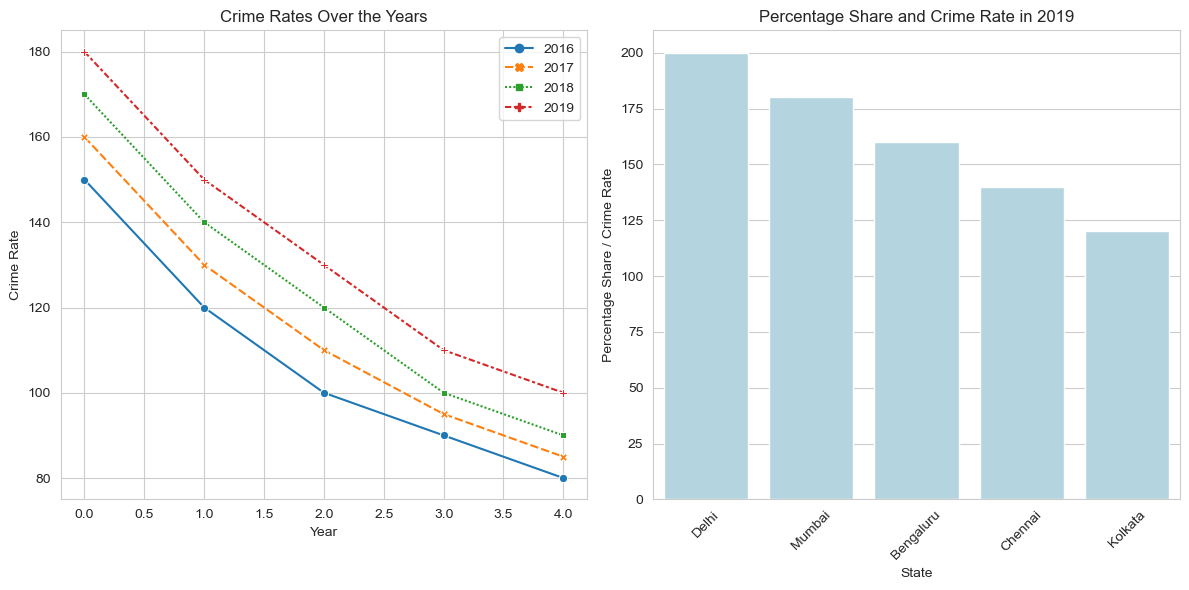

In [131]:
import seaborn as sns


# Sample data
states = ['Delhi', 'Mumbai', 'Bengaluru', 'Chennai', 'Kolkata']
crime_rates_2016 = [150, 120, 100, 90, 80]
crime_rates_2017 = [160, 130, 110, 95, 85]
crime_rates_2018 = [170, 140, 120, 100, 90]
crime_rates_2019 = [180, 150, 130, 110, 100]
percentage_share = [10, 20, 30, 25, 15]
crime_rate_2019 = [200, 180, 160, 140, 120]

# Create a DataFrame
import pandas as pd
data = pd.DataFrame({
    'States': states,
    '2016': crime_rates_2016,
    '2017': crime_rates_2017,
    '2018': crime_rates_2018,
    '2019': crime_rates_2019,
    'Percentage share of state/UT (2019)': percentage_share,
    'Crime rate in 2019 (IPC+SLL crimes)': crime_rate_2019
})

# Set the style
sns.set_style("whitegrid")

# Plotting
plt.figure(figsize=(12, 6))

# Plot for crime rates over the years
plt.subplot(1, 2, 1)
sns.lineplot(data=data.iloc[:, 1:5], markers=True)
plt.title('Crime Rates Over the Years')
plt.xlabel('Year')
plt.ylabel('Crime Rate')

# Plot for percentage share and crime rate in 2019
plt.subplot(1, 2, 2)
sns.barplot(x='States', y='Percentage share of state/UT (2019)', data=data, palette='pastel')
sns.barplot(x='States', y='Crime rate in 2019 (IPC+SLL crimes)', data=data, color='lightblue')
plt.title('Percentage Share and Crime Rate in 2019')
plt.xlabel('State')
plt.ylabel('Percentage Share / Crime Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

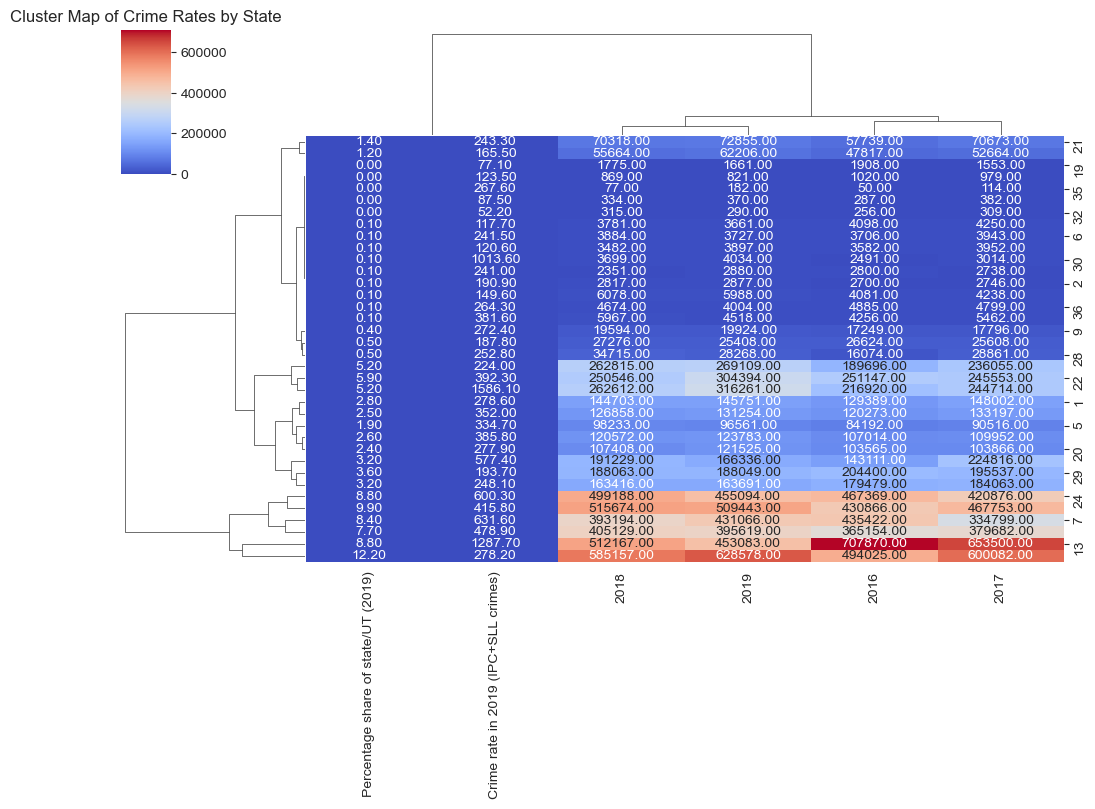

In [132]:
# Cluster map with annotations
plt.figure(figsize=(10, 8))
cluster_map = sns.clustermap(df1.drop(['States'], axis=1), cmap='coolwarm', annot=True, fmt=".2f", figsize=(10, 8))
plt.title('Cluster Map of Crime Rates by State')
plt.show()



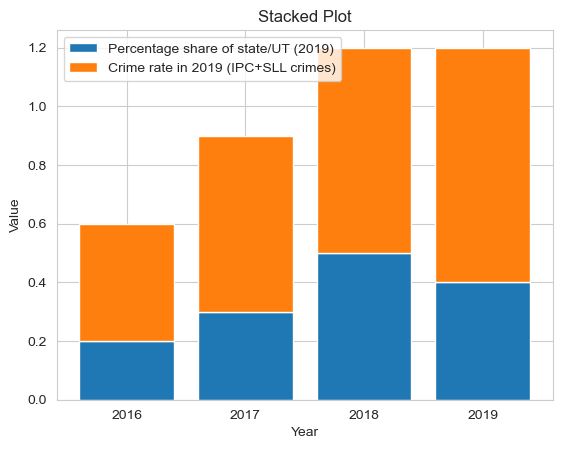

In [133]:


# Sample data (replace with your actual data)
years = ['2016', '2017', '2018', '2019']
categories = ['Percentage share of state/UT (2019)', 'Crime rate in 2019 (IPC+SLL crimes)']
values = [
    [0.2, 0.3, 0.5, 0.4],  # Sample values for the first category
    [0.4, 0.6, 0.7, 0.8]   # Sample values for the second category
]

def stacked_plot(years, categories, values):
    # Plot the first category
    plt.bar(years, values[0], label=categories[0])
    bottom = values[0]  # Set the bottom for the next category
    
    # Plot the rest of the categories, stacked on top of each other
    for i in range(1, len(categories)):
        plt.bar(years, values[i], bottom=bottom, label=categories[i])
        bottom = [sum(x) for x in zip(bottom, values[i])]  # Update the bottom
        
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title('Stacked Plot')
    plt.legend()
    plt.show()

# Generate and display the stacked plot
stacked_plot(years, categories, values)


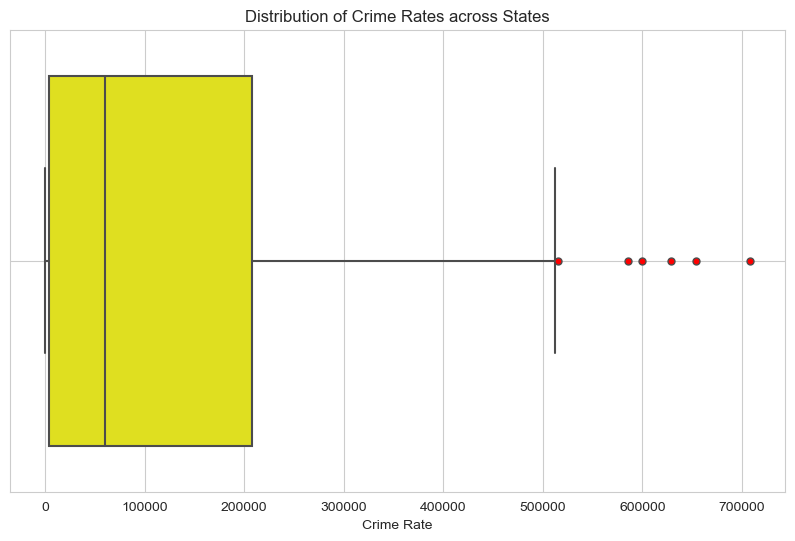

In [165]:

# Create a box plot of crime rates with yellow box and red outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_df, x='Crime Rate', color='yellow', flierprops=dict(markerfacecolor='red', marker='o'))
plt.title('Distribution of Crime Rates across States')
plt.xlabel('Crime Rate')
plt.grid(True)
plt.show()


In [166]:
# Calculate the total crime rate in 2019
total_crime_2019 = melted_df[melted_df['Year'] == '2019']['Crime Rate'].sum()

# Calculate the percentage share of crime for each state in 2019
melted_df['Percentage Share'] = melted_df.apply(lambda row: (row['Crime Rate'] / total_crime_2019) * 100, axis=1)

# Group by state and sum the percentage shares
state_percentage = melted_df.groupby('State')['Percentage Share'].sum().reset_index()

# Sort states by percentage share
state_percentage = state_percentage.sort_values(by='Percentage Share', ascending=False)


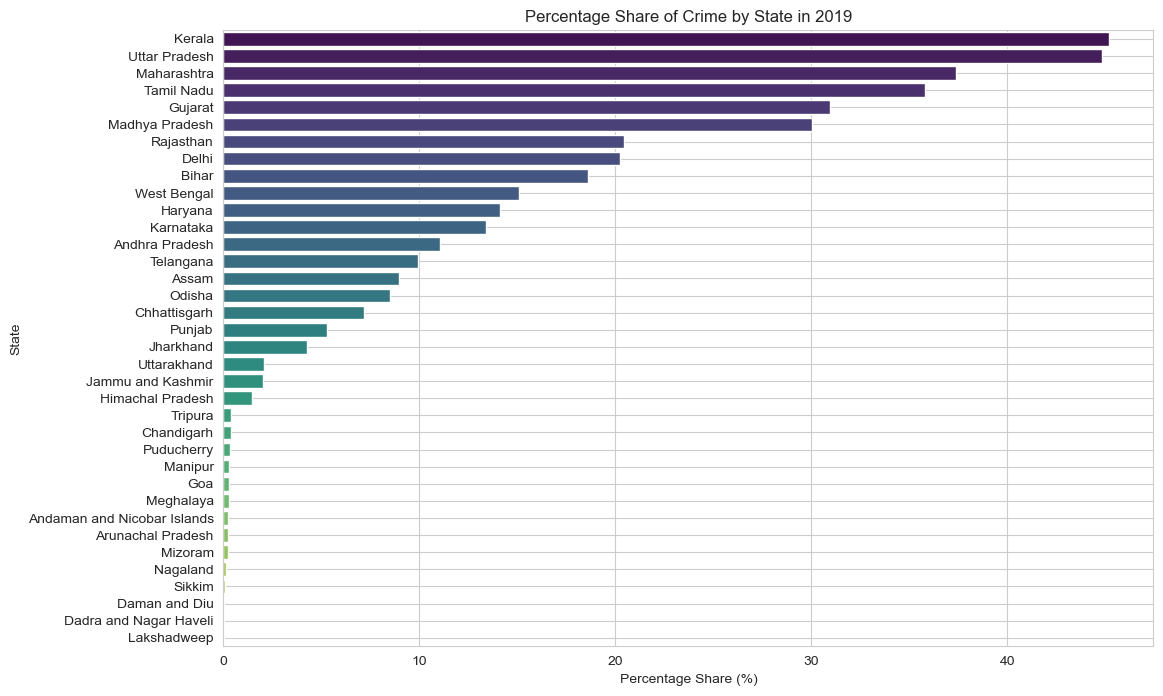

In [167]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Percentage Share', y='State', data=state_percentage, palette='viridis')
plt.title('Percentage Share of Crime by State in 2019')
plt.xlabel('Percentage Share (%)')
plt.ylabel('State')
plt.grid(True)
plt.show()

In [168]:

region_mapping = {
    'North': ['Delhi', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Punjab', 'Rajasthan', 'Uttar Pradesh', 'Uttarakhand'],
    'South': ['Andhra Pradesh', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Telangana'],
    'East': ['Bihar', 'Jharkhand', 'Odisha', 'West Bengal'],
    'West': ['Goa', 'Gujarat', 'Maharashtra'],
    'Central': ['Chhattisgarh', 'Madhya Pradesh'],
    'Northeast': ['Arunachal Pradesh', 'Assam', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Sikkim', 'Tripura']
}

melted_df['Region'] = melted_df['State'].apply(lambda state: next((region for region, states in region_mapping.items() if state in states), 'Other'))

# Calculate the average crime rates for each region
avg_crime_rates_by_region = melted_df.groupby('Region')['Crime Rate'].mean().reset_index()

# Sort regions by average crime rate
avg_crime_rates_by_region = avg_crime_rates_by_region.sort_values(by='Crime Rate', ascending=False)

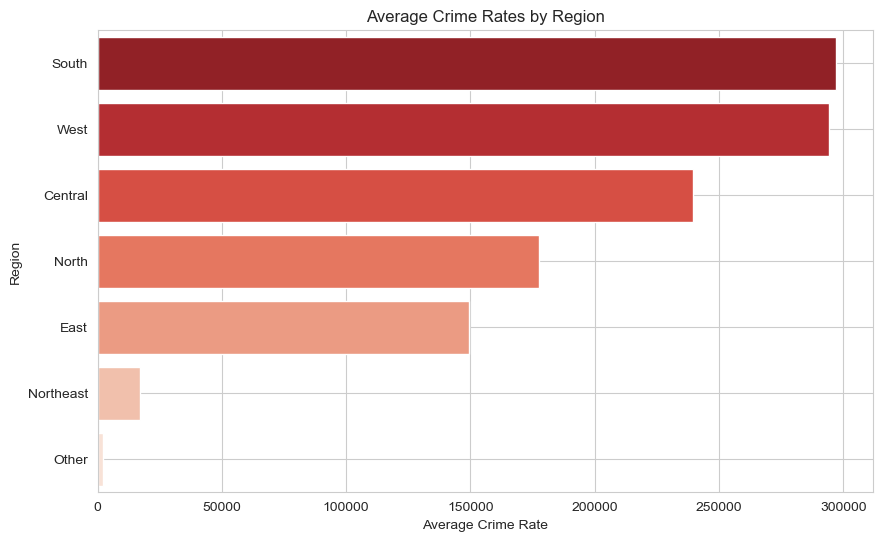

In [169]:
# Visualize the comparison using a bar chart with reversed red color palette
plt.figure(figsize=(10, 6))
sns.barplot(x='Crime Rate', y='Region', data=avg_crime_rates_by_region, palette=sns.color_palette('Reds', len(avg_crime_rates_by_region))[::-1])
plt.title('Average Crime Rates by Region')
plt.xlabel('Average Crime Rate')
plt.ylabel('Region')
plt.grid(True)
plt.show()


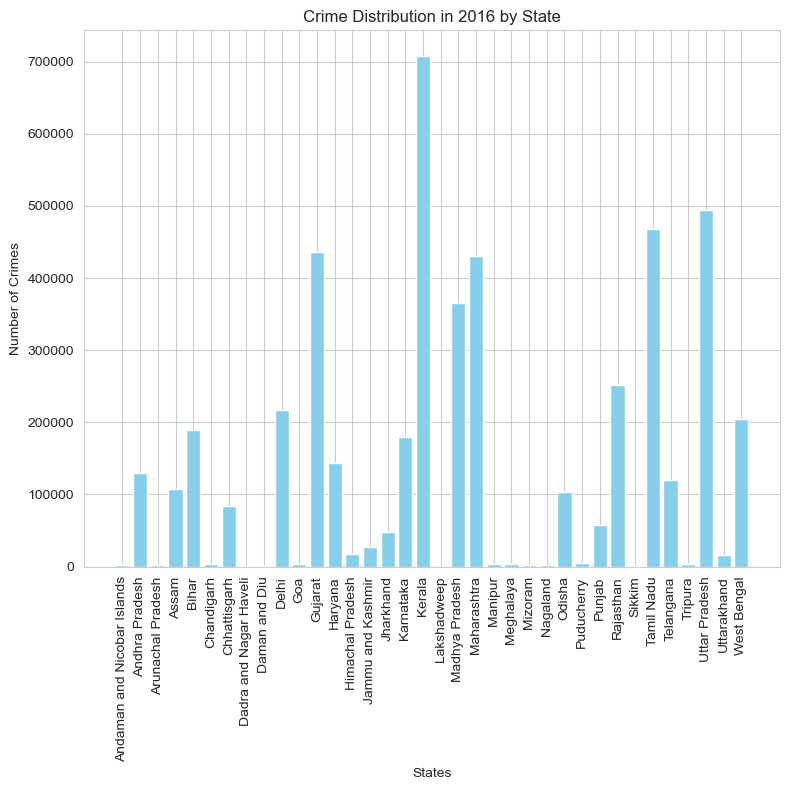

In [136]:
# Plotting the bar plot
plt.figure(figsize=(8, 8))
plt.bar(df['States'], df['2016'], color='skyblue')
plt.title('Crime Distribution in 2016 by State')
plt.xlabel('States')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



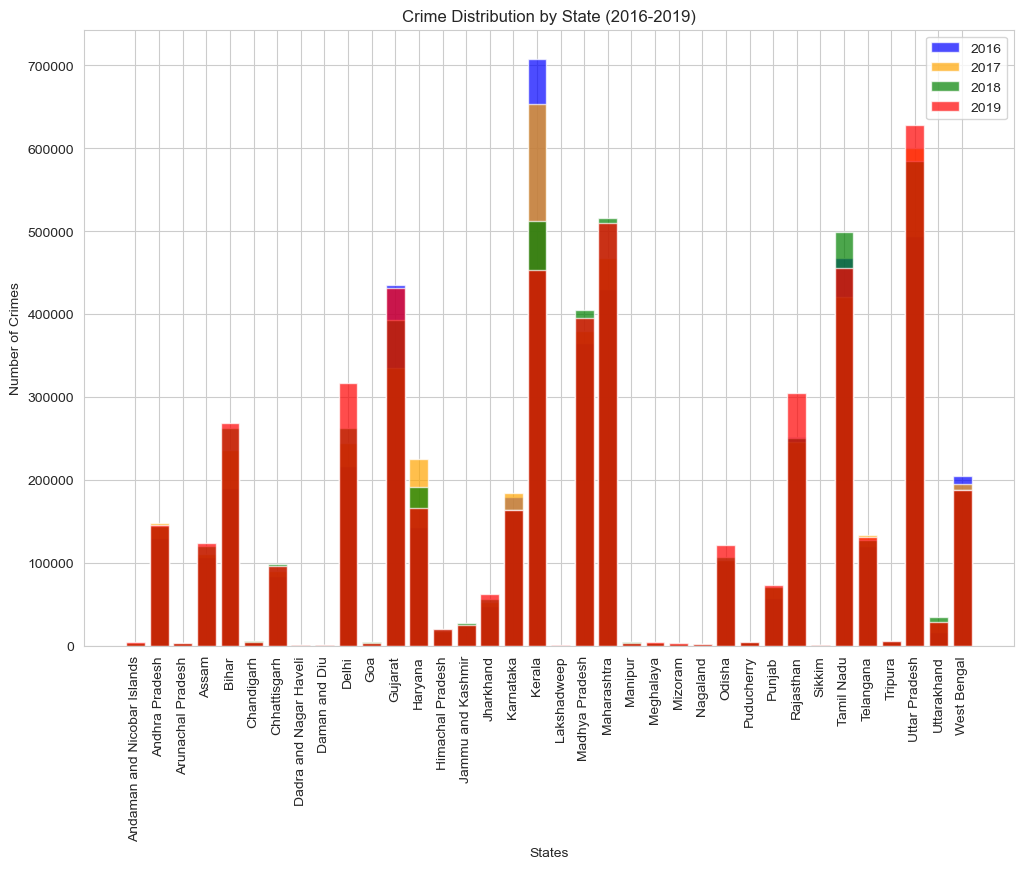

In [137]:

crime_years = df[['States', '2016', '2017', '2018', '2019']]

# Plotting the bar chart
plt.figure(figsize=(12, 8))

# Specify colors for each year
colors = ['blue', 'orange', 'green', 'red']

# Loop through each year and plot
for i, year in enumerate(['2016', '2017', '2018', '2019']):
    plt.bar(crime_years['States'], crime_years[year], color=colors[i], alpha=0.7, label=year)

plt.title('Crime Distribution by State (2016-2019)')
plt.xlabel('States')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.legend()
plt.show()


<Figure size 3000x2000 with 0 Axes>

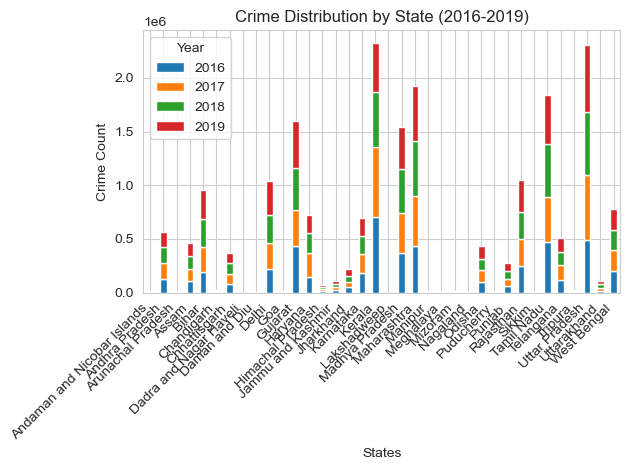

In [138]:
# Convert the columns to numeric data type
df1[['2016', '2017', '2018', '2019']] = df1[['2016', '2017', '2018', '2019']].apply(pd.to_numeric, errors='coerce')

# Drop the row for 'India'
df = df[df['States'] != 'India']

# Plotting the stacked bar chart
plt.figure(figsize=(30, 20))  # Increase the figure size
df.set_index('States')[['2016', '2017', '2018', '2019']].plot(kind='bar', stacked=True)
plt.title('Crime Distribution by State (2016-2019)')
plt.xlabel('States')
plt.ylabel('Crime Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Year')
plt.tight_layout()
plt.show()


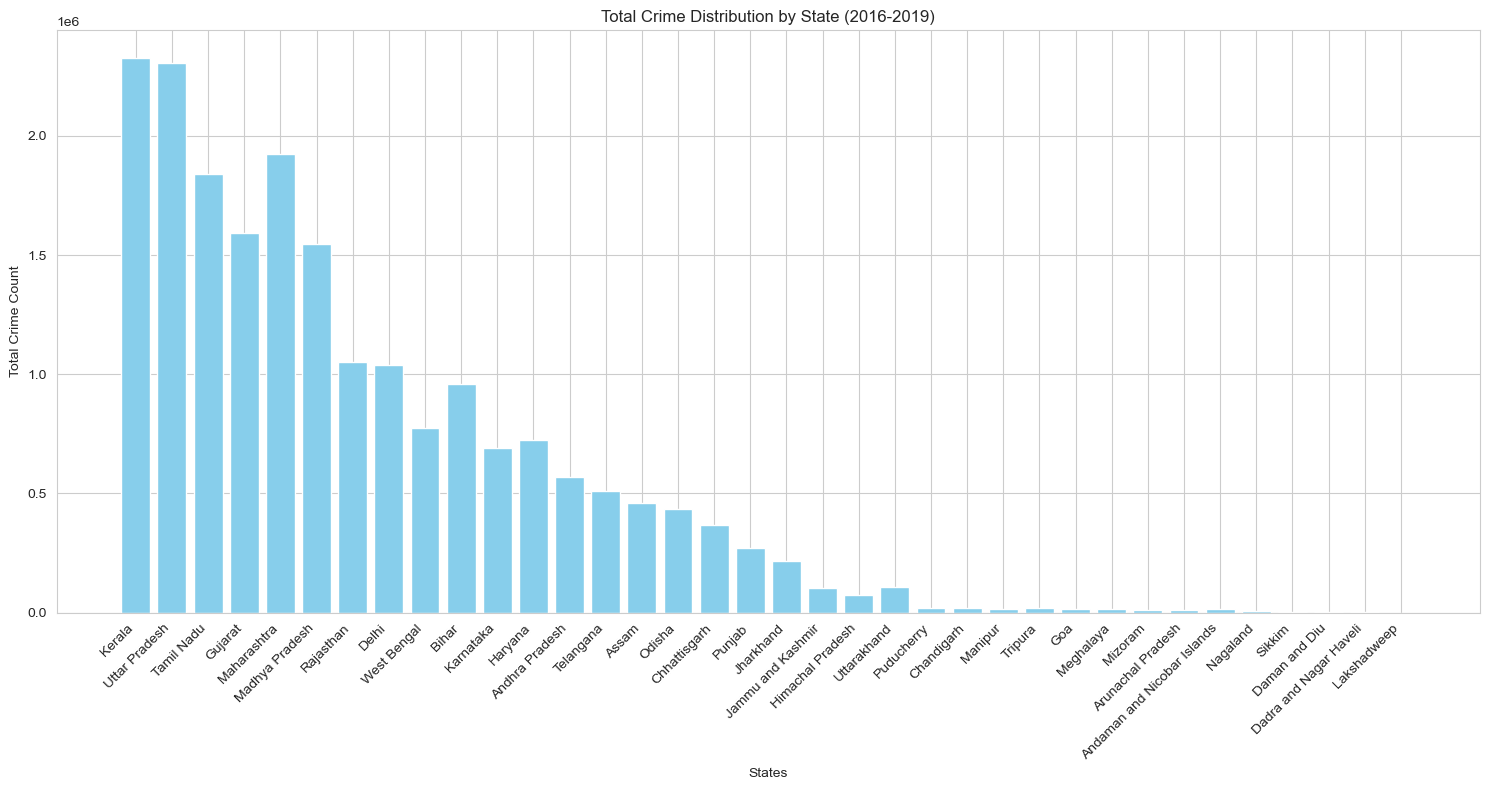

In [139]:
# Calculate the total crime for each state over the four years
df1['Total Crime'] = df1[['2016', '2017', '2018', '2019']].sum(axis=1)

# Plotting the total crime for each state
plt.figure(figsize=(15, 8))
plt.bar(df1['States'], df1['Total Crime'], color='skyblue')
plt.title('Total Crime Distribution by State (2016-2019)')
plt.xlabel('States')
plt.ylabel('Total Crime Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


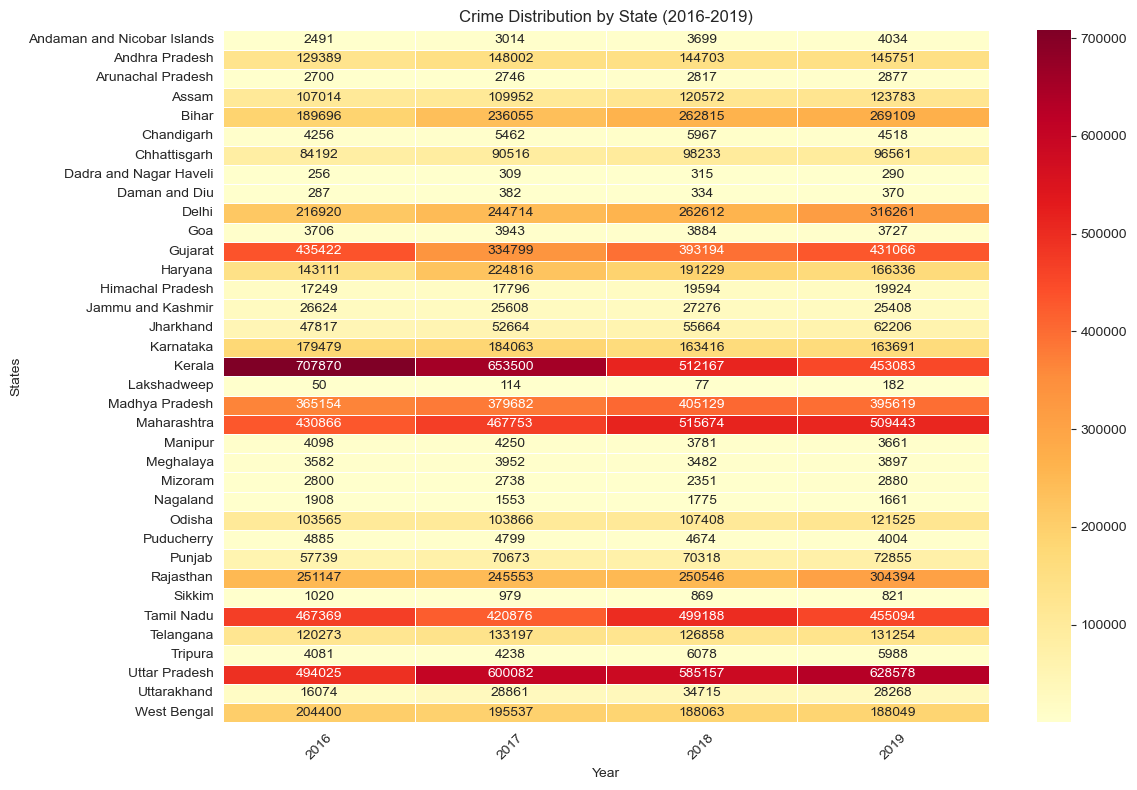

In [140]:
import seaborn as sns

# Extract the relevant data for heatmap (excluding the 'Total Crime' column)
heatmap_data = df[['States', '2016', '2017', '2018', '2019']].set_index('States')

# Create a custom color palette from light orange to dark red
palette = sns.color_palette("YlOrRd", as_cmap=True)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap=palette, annot=True, fmt='.0f', linewidths=.5)
plt.title('Crime Distribution by State (2016-2019)')
plt.xlabel('Year')
plt.ylabel('States')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [141]:
import geopandas as gpd
import pandas as pd
import numpy as np
import plotly.express as px

# get some geojson for India.  Reduce somplexity of geometry to make it more efficient
url = "https://raw.githubusercontent.com/Subhash9325/GeoJson-Data-of-Indian-States/master/Indian_States"
gdf = gpd.read_file(url)
gdf["geometry"] = gdf.to_crs(gdf.estimate_utm_crs()).simplify(1000).to_crs(gdf.crs)
india_states = gdf.rename(columns={"NAME_1": "ST_NM"}).__geo_interface__

# Provided values for the year 2016
values_2016 = {
    'Kerala': 707870,
    'Uttar Pradesh': 494025,
    'Tamil Nadu': 467369,
    'Gujarat': 435422,
    'Maharashtra': 430866,
    'Madhya Pradesh': 365154,
    'Rajasthan': 251147,
    'Delhi': 216920,
    'West Bengal': 204400,
    'Bihar': 189696,
    'Karnataka': 179479,
    'Haryana': 143111,
    'Andhra Pradesh': 129389,
    'Telangana': 120273,
    'Assam': 107014,
    'Odisha': 103565,
    'Chhattisgarh': 84192,
    'Punjab': 57739,
    'Jharkhand': 47817,
    'Jammu and Kashmir': 26624,
    'Himachal Pradesh': 17249,
    'Uttarakhand': 16074,
    'Puducherry': 4885,
    'Chandigarh': 4256,
    'Manipur': 4098,
    'Tripura': 4081,
    'Goa': 3706,
    'Meghalaya': 3582,
    'Mizoram': 2800,
    'Arunachal Pradesh': 2700,
    'Andaman and Nicobar Islands': 2491,
    'Nagaland': 1908,
    'Sikkim': 1020,
    'Daman and Diu': 287,
    'Dadra and Nagar Haveli': 256,
    'Lakshadweep': 50
}

# Simulate DataFrame containing states and data for the year 2016
data_2016 = {
    'States': list(values_2016.keys()),
    '2016': list(values_2016.values())
}
dff = pd.DataFrame(data_2016)

# Create base map of all India states
fig_choropleth = px.choropleth(
    pd.json_normalize(india_states["features"])["properties.ST_NM"],
    locations="properties.ST_NM",
    geojson=india_states,
    featureidkey="properties.ST_NM",
    color_discrete_sequence=["lightgrey"],
)

# Add traces for the choropleth map with data
fig_choropleth.add_traces(
    px.choropleth(
        dff,
        locations="States",
        geojson=india_states,
        featureidkey="properties.ST_NM",
        locationmode="geojson-id",
        color="2016",
        scope="asia",
    ).data
)

# Restrict to just India
fig_choropleth.update_geos(fitbounds="locations", visible=False)
fig_choropleth


# State Wise

In [142]:
file_path = r'C:\Users\Aarajula\Desktop\Telangana Crime.xlsx'
T_crime = pd.read_excel(file_path, header=[0, 1, 2, 3])


In [143]:
T_crime

Unnamed: 0_level_0   Unnamed: 1_level_0 Unnamed: 2_level_0  \
                   Head of the Crime    Head of the Crime  Head of the Crime   
                  Unnamed: 0_level_2   Unnamed: 1_level_2                DEC   
                  Unnamed: 0_level_3   Unnamed: 1_level_3               2018   
0                     PROPERTY CRIME                  NaN                NaN   
1                                  1      MURDER FOR GAIN                4.0   
2                                  2            DACOITIES                1.0   
3                                  3            ROBBERIES               45.0   
4                                  4          BURGALARIES              337.0   
5                                  5      ORDINARY THEFTS              813.0   
6                                NaN                Total             1200.0   
7                    BODILY OFFENCES                  NaN                NaN   
8                                  6              MURDERS               48.0   
9                                  7    CULPABLE HOMICIDE               13.0   
10                                 8             RIOTINGS               67.0   
11                                 9  KIDNAPING/ABDUCTION              127.0   
12                                10           RAPE CASES               94.0   
13                                11           HURT CASES             1141.0   
14                               NaN                Total             1490.0   
15                WHITE COLLAR CRIME                  NaN                NaN   
16                                12            CHEATINGS              585.0   
17                                13        CR. BR. TRUST               29.0   
18                                14          COUNTERFEIT                1.0   
19                                15     STUPEFYING DRUGS                0.0   
20                               NaN                Total              615.0   
21                                16            OTHER IPC             5357.0   
22  TOTAL COGNIZABLE CRIME UNDER IPC                  NaN             8662.0   

   Unnamed: 3_level_0 Unnamed: 4_level_0        Unnamed: 5_level_0  \
    Head of the Crime  Head of the Crime         Head of the Crime   
                  NOV                DEC Variation in DEC over NOV   
                 2018               2017        Unnamed: 5_level_3   
0                 NaN                NaN                       NaN   
1                 5.0                2.0                      -0.2   
2                 4.0               16.0                     -0.75   
3                60.0               51.0                     -0.25   
4               292.0              365.0                    0.1541   
5               946.0              883.0                   -0.1406   
6              1307.0             1317.0                   -0.0819   
7                 NaN                NaN                       NaN   
8                48.0               52.0                         0   
9                 9.0               13.0                    0.4444   
10               40.0               72.0                     0.675   
11              140.0              101.0                   -0.0929   
12              100.0              109.0                     -0.06   
13             1115.0             1304.0                    0.0233   
14             1452.0             1651.0                    0.0262   
15                NaN                NaN                       NaN   
16              708.0              785.0                   -0.1737   
17               31.0               69.0                   -0.0645   
18                2.0                3.0                      -0.5   
19                0.0                0.0                   #DIV/0!   
20              741.0              857.0                     -0.17   
21             5721.0             5661.0                   -0.0636   
22             9221.0             948

In [144]:
T_crime.columns = T_crime.columns.droplevel([0, 1, 2])

In [145]:
T_crime = T_crime.fillna(' ')

In [146]:
T_crime.columns = [' '] * len(T_crime.columns)

In [147]:
T_crime = T_crime.fillna(' ')

In [148]:
T_crime.reset_index(drop = True, inplace = True)

In [149]:
columns = [
     "Crime Type", "Sub-Type", "DEC_2018", "NOV_2018", "DEC_17", "Variation_in_DEC_over_NOV",
    "upto_DEC_2018",'xyz', "Variation_in_2018_over _2017", "upto_DEC_2017", "upto_DEC_2016"
]

# Create DataFrame
df_t = pd.DataFrame(T_crime)

# Set column names
df_t.columns = columns


In [150]:
df_t

Crime Type             Sub-Type DEC_2018 NOV_2018  \
0                     PROPERTY CRIME                                          
1                                  1      MURDER FOR GAIN      4.0      5.0   
2                                  2            DACOITIES      1.0      4.0   
3                                  3            ROBBERIES     45.0     60.0   
4                                  4          BURGALARIES    337.0    292.0   
5                                  5      ORDINARY THEFTS    813.0    946.0   
6                                                   Total   1200.0   1307.0   
7                    BODILY OFFENCES                                          
8                                  6              MURDERS     48.0     48.0   
9                                  7    CULPABLE HOMICIDE     13.0      9.0   
10                                 8             RIOTINGS     67.0     40.0   
11                                 9  KIDNAPING/ABDUCTION    127.0    140.0   
12                                10           RAPE CASES     94.0    100.0   
13                                11           HURT CASES   1141.0   1115.0   
14                                                  Total   1490.0   1452.0   
15                WHITE COLLAR CRIME                                          
16                                12            CHEATINGS    585.0    708.0   
17                                13        CR. BR. TRUST     29.0     31.0   
18                                14          COUNTERFEIT      1.0      2.0   
19                                15     STUPEFYING DRUGS      0.0      0.0   
20                                                  Total    615.0    741.0   
21                                16            OTHER IPC   5357.0   5721.0   
22  TOTAL COGNIZABLE CRIME UNDER IPC                        8662.0   9221.0   

    DEC_17 Variation_in_DEC_over_NOV upto_DEC_2018 xyz  \
0                                                        
1      2.0                      -0.2          45.0       
2     16.0                     -0.75          46.0       
3     51.0                     -0.25         569.0       
4    365.0                    0.1541        4230.0       
5    883.0                   -0.1406       11343.0       
6   1317.0                   -0.0819       16233.0       
7                                                        
8     52.0                         0         716.0       
9     13.0                    0.4444         150.0       
10    72.0                     0.675         633.0       
11   101.0                   -0.0929        1266.0       
12   109.0                     -0.06        1694.0       
13  1304.0                    0.0233       16558.0       
14  1651.0                    0.0262       21017.0       
15                                                       
16   785.0                   -0.1737        9242.0       
17    69.0                   -0.0645         512.0       
18     3.0                      -0.5          24.0       
19     0.0                   #DIV/0!           2.0       
20   857.0                     -0.17        9780.0       
21  5661.0                   -0.0636       63834.0       
22  9486.0                   -0.0606      110864.0       

   Variation_in_2018_over _2017 upto_DEC_2017 upto_DEC_2016  
0                                                            
1                          42.0          80.0        0.0714  
2                          69.0          62.0       -0.3333  
3                         790.0         655.0       -0.2797  
4                        4710.0        4691.0       -0.1019  
5                       11977.0       12006.0       -0.0529  
6                       17588.0       17494.0        -0.077  
7                                                            
8                         739.0         951.0       -0.0311  
9                         145.0         136.0        0.0345  
10                        559.0         488.0        0

In [151]:
df_t['DEC_2018'] = df_t['DEC_2018'].fillna({0: 0, 7: 0, 15: 0})

In [152]:
df_t['DEC_2018']

0           
1        4.0
2        1.0
3       45.0
4      337.0
5      813.0
6     1200.0
7           
8       48.0
9       13.0
10      67.0
11     127.0
12      94.0
13    1141.0
14    1490.0
15          
16     585.0
17      29.0
18       1.0
19       0.0
20     615.0
21    5357.0
22    8662.0
Name: DEC_2018, dtype: object

In [153]:
df_t.drop(columns = ['xyz'], inplace = True)


In [154]:
import os

In [155]:
os.getcwdb()

b'C:\\Users\\Aarajula\\Batch 261\\Python'